### Assignment 3: Exploratory Data Analysis

In [352]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler


**Loading the dataset**

In [353]:
netflix_overall=pd.read_csv('netflix_titles.csv')

# netflix_overall is a pandas dataframe object

# A pandas DataFrame is a two-dimensional, size-mutable, and heterogeneous tabular data structure with labeled axes (rows and columns). It is similar to a spreadsheet or SQL table, where data can be stored and manipulated efficiently.

In [354]:
netflix_overall.head(10)
# Display the first few rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Examination of data distribution

In [355]:
# Compute summary statistics such as mean, median, mode, standard deviation, minimum, maximum, and quartiles for numerical variables using the describe() method in pandas.
print(netflix_overall.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [356]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [357]:
netflix_overall.shape

(8807, 12)

In [358]:
netflix_overall.count()

# counts non null rows for each column

# This information can be helpful in understanding the completeness of the dataset and identifying columns with missing data that may need further investigation or handling.


show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

Histogram Plotting

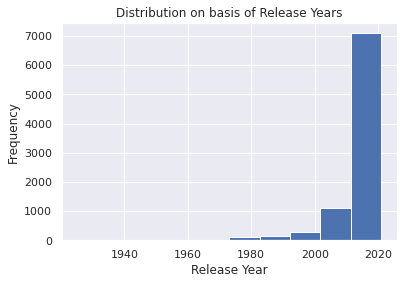

In [359]:
# Visualize the distribution of numerical variables using histograms. This helps in understanding the frequency distribution of values.

netflix_overall['release_year'].hist()
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution on basis of Release Years')
plt.show()

Kernel Density Estimation (KDE) Plot

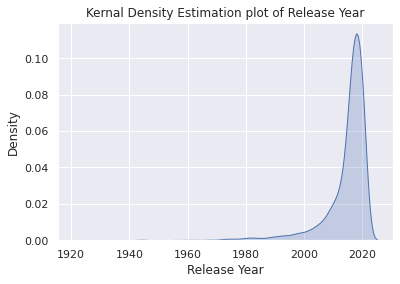

In [360]:
sns.kdeplot(netflix_overall['release_year'],fill=True)
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.title('Kernal Density Estimation plot of Release Year')
plt.show()

Box Plots

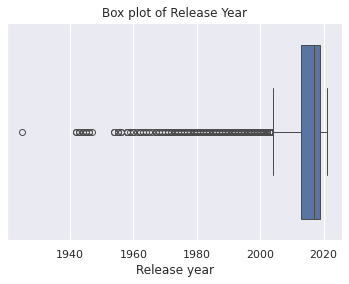

In [361]:
# Box plots help in visualizing the distribution of numerical variables along with identifying outliers and central tendency.

sns.boxplot(x=netflix_overall['release_year'])
plt.xlabel('Release year')
plt.title('Box plot of Release Year')
plt.show()

Quantile-Quantile Plot

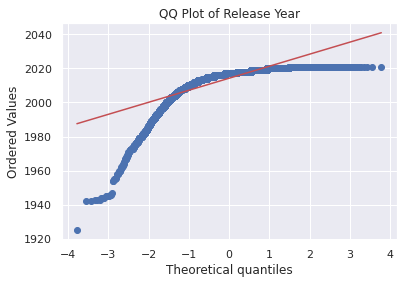

In [362]:
# QQ (Quantile-Quantile) plots are used to compare the distribution of data to a theoretical distribution (e.g., normal distribution) visually.

stats.probplot(netflix_overall['release_year'], dist="norm", plot=plt)
plt.title('QQ Plot of Release Year')
plt.show()

Empirical Cumulative Distribution Function (ECDF) Plot

In [363]:
# Assuming netflix_overall is your DataFrame
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# ECDF plots show the empirical cumulative distribution of a variable, which can be useful for understanding the distribution of data points.

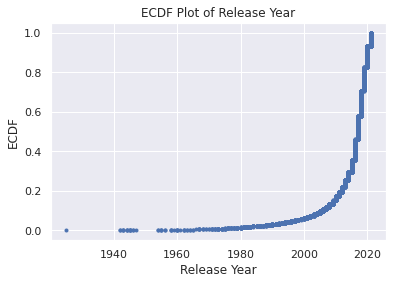

In [364]:

x, y = ecdf(netflix_overall['release_year'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Release Year')
plt.ylabel('ECDF')
plt.title('ECDF Plot of Release Year')
plt.show()


Pairplot

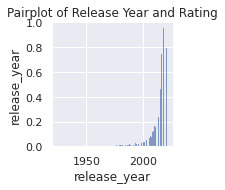

In [365]:
#Pairplot is used to visualize the pairwise relationships and distributions between multiple variables in a dataset.
sns.pairplot(netflix_overall[['release_year','rating']])
plt.xlabel('Release Year')
plt.ylabel('Ratings')
plt.title('Pairplot of Release Year and Rating')
plt.show()


Analysis of Movies vs TV Shows

2676
6131


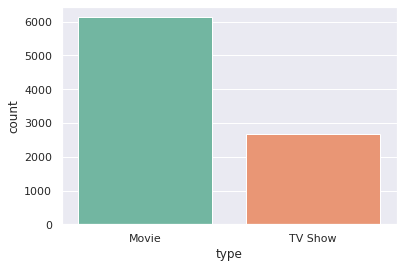

In [366]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
print(len(netflix_shows))
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']
print(len(netflix_movies))




ax = sns.countplot(x='type', hue='type', data=netflix_overall, palette="Set2", legend=False)


Ratings Analysis

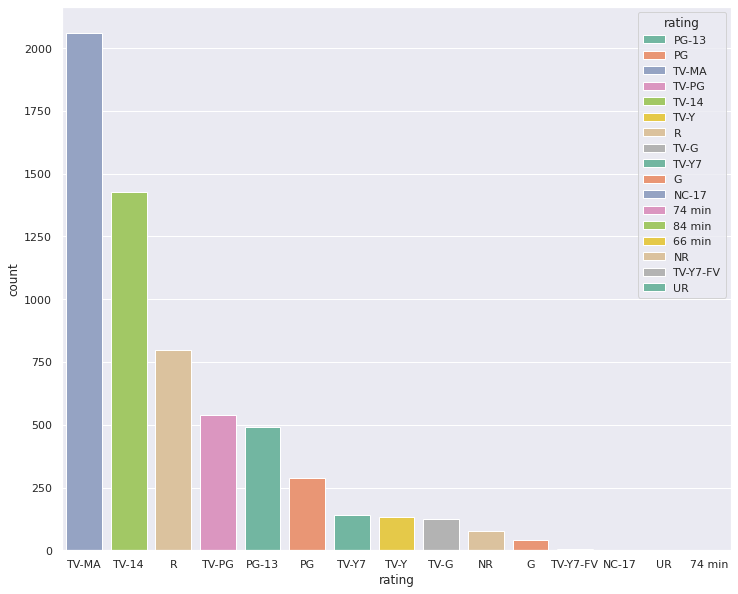

In [367]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")

ax = sns.countplot(x="rating",hue='rating',data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

Encoding the categorical variables

In [368]:
netflix_overall.shape

(8807, 12)

In [369]:
netflix_encoded = pd.get_dummies(netflix_overall, columns=['type'])
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


One-hot encoding is a technique used to convert categorical variables into a binary format where each category is represented as a binary feature (0 or 1).

In [370]:
label_encoder = LabelEncoder()
netflix_overall['rating_encoded'] = label_encoder.fit_transform(netflix_overall['rating'])
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,11
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",11
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",8
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",14
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,8
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",6


Label encoding is another technique used to convert categorical variables into numerical format by assigning a unique integer to each category.

Each unique category in the 'rating' column is assigned a numerical label using the fit_transform() method of the label encoder.

In [371]:
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,11
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",11
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",8
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",14
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,8
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",6


Scaling

In [372]:
# Standardizing (Z-score scaling)
standard_scaler = StandardScaler()
netflix_overall['rating_encoded_standardized'] = standard_scaler.fit_transform(netflix_overall[['rating_encoded']])

In [373]:
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_encoded,rating_encoded_standardized
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7,-1.537400
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",11,0.500281
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,11,0.500281
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",11,0.500281
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,11,0.500281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",8,-1.027980
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",14,2.028542
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,8,-1.027980
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",6,-2.046820


Missing values

In [374]:
# Missing values column-wise
missing_column_wise = netflix_overall.isna().sum()

missing_column_wise

show_id                           0
type                              0
title                             0
director                       2634
cast                            825
country                         831
date_added                       10
release_year                      0
rating                            4
duration                          3
listed_in                         0
description                       0
rating_encoded                    0
rating_encoded_standardized       0
dtype: int64

Dropping missing values - Simplest approach

In [375]:
# Drop rows with any missing values
# netflix_overall.dropna(inplace=True)

Imputation: Imputation involves replacing missing values with some estimated value. This can be the mean, median, mode, or a value predicted by a model.

In [376]:
# Fill missing values with the mean of the column
# netflix_overall['column_name'].fillna(netflix_overall['column_name'].mean(), inplace=True)

# hence done on number datatype

Forward or Backward Fill: Missing values are filled using the value from the previous or next row in the dataset.


In [377]:
# Forward fill missing values
netflix_overall.fillna(method='ffill', inplace=True)

Interpolation: Missing values are estimated based on the values of neighboring data points.

In [378]:
# Interpolate missing values linearly
netflix_overall.interpolate(method='linear', inplace=True)


A pie chart is a common way to represent the part of a whole relationship in a dataset. Each segment of the pie represents a proportion of the whole.

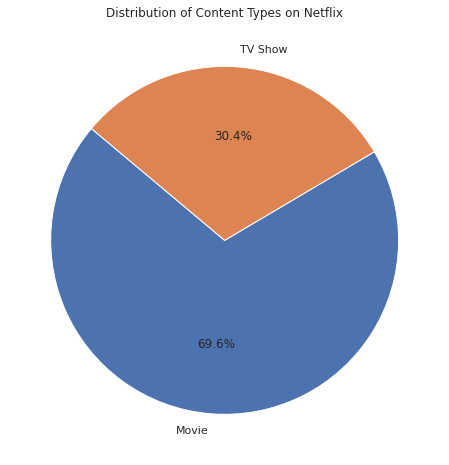

In [379]:
# Calculate the count of each type
type_counts = netflix_overall['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types on Netflix')
plt.show()

This heatmap visualizes the correlation between different numerical columns in your dataset. 

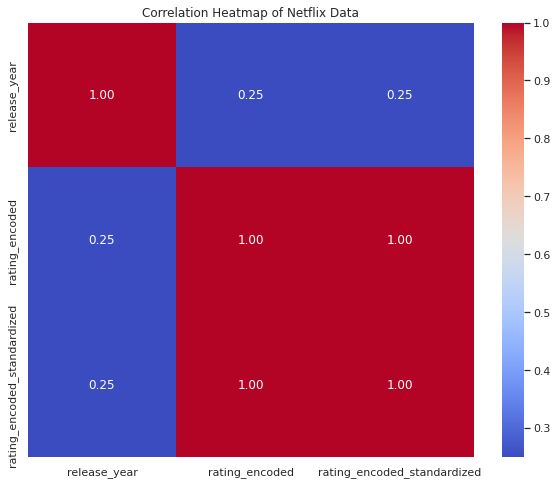

In [381]:
# Calculate the correlation matrix
correlation_matrix = netflix_overall.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Netflix Data')
plt.show()

Visualize the relation between different columns using a regression plot/scatter plot for doing analysis

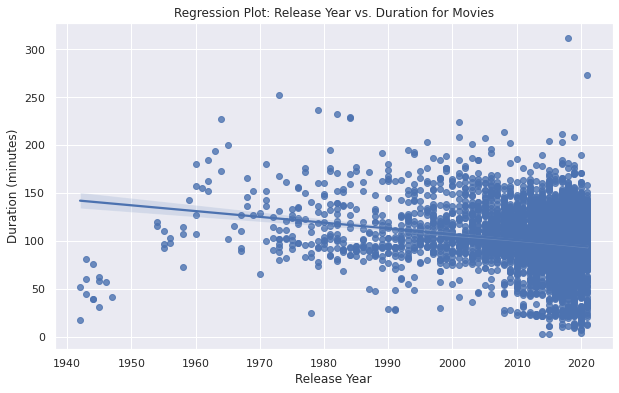

In [387]:
# Example: Preprocessing the 'duration' column to extract numeric values
netflix_overall['duration_num'] = netflix_overall['duration'].str.extract('(\d+)', expand=False).astype(float)


# Filter the DataFrame to include only rows where the 'type' column is 'Movie'
movies_df = netflix_overall[netflix_overall['type'] == 'Movie']

# Example: Visualizing the relationship between release_year and duration for movies
plt.figure(figsize=(10, 6))
sns.regplot(x='release_year', y='duration_num', data=movies_df)
plt.title('Regression Plot: Release Year vs. Duration for Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

Column (or Bar) Charts:
Column charts are used to compare different categories of data by representing them as bars. They are effective for visualizing categorical data or comparing discrete values.

Text(0, 0.5, 'Count')

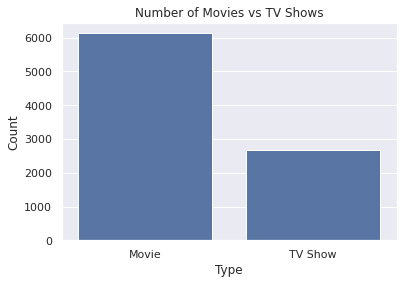

In [388]:
sns.countplot(x='type', data=netflix_overall)
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')


Dot Plot:
Dot plots display individual data points along a number line. They are useful for comparing individual data points or showing distributions.

Text(0, 0.5, 'Release Year')

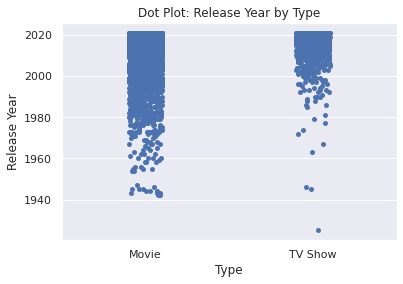

In [389]:
sns.stripplot(x='type', y='release_year', data=netflix_overall, jitter=True)
plt.title('Dot Plot: Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')


Jitter Plot:
Jitter plots are similar to scatter plots but with a small amount of random noise added to the data points along the categorical axis. They are useful for avoiding overlap in categorical data visualization.

Text(0, 0.5, 'Release Year')

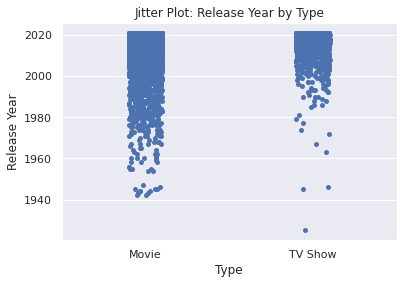

In [390]:
sns.stripplot(x='type', y='release_year', data=netflix_overall, jitter=True)
plt.title('Jitter Plot: Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')


Error Bar Plot:
Error bar plots are used to display the variability of data. They are commonly used to visualize confidence intervals or standard deviations.

Text(0, 0.5, 'Release Year (Mean)')

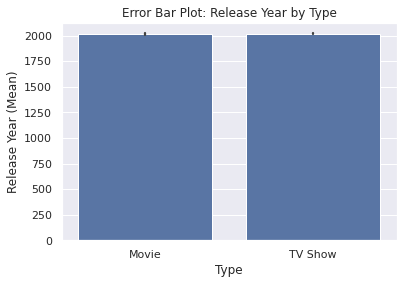

In [392]:
sns.barplot(x='type', y='release_year', data=netflix_overall, errorbar='sd')
plt.title('Error Bar Plot: Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year (Mean)')
